# Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()   ### 집값 예측
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 데이터 탐색

In [4]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

In [5]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


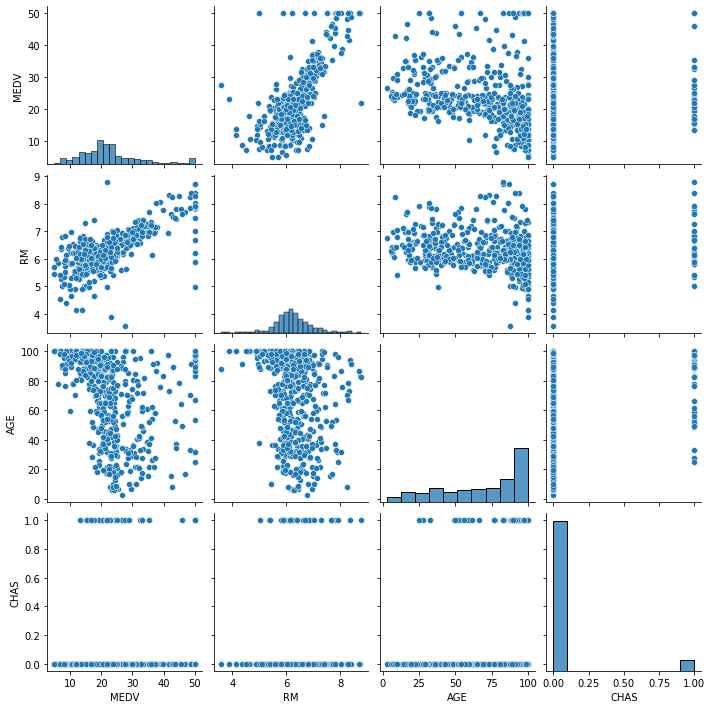

In [6]:
sns.pairplot(df[['MEDV','RM','AGE','CHAS']])
plt.show()

- 시각화 결과, MEDV와 RM은 선형 관계가 보임

### 회귀 적용

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  ### confusion matrix말고 수치예측에선 MSE를 많이 사용
from math import sqrt

In [8]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)

In [9]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [10]:
print(lr.intercept_)  ### y=ax+b에서 절편(b)
print(lr.coef_)       ### y=ax+b에서 a(변수 여러개면 a1, a2, a3 ~)

36.24995056820916
[-1.10406211e-01  3.88619587e-02  5.17270039e-03  1.40543198e+00
 -1.70195972e+01  3.90919039e+00 -3.82451247e-03 -1.42186188e+00
  2.92896807e-01 -1.33156903e-02 -9.47835768e-01  7.68749114e-03
 -4.75992594e-01]


In [11]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7522908399602389
0.6846868305630155


In [12]:
y_prediction  = lr.predict(X_train)
print(y_prediction)

[22.6199477  34.35750316 12.93964048 10.03258907 19.77795589 36.14744068
 20.27704418 27.40448574 24.65418183 20.85267695 13.7481405  17.20020514
 18.67188164 13.08931566 17.14242815 16.29236852 39.24224595 24.67107244
 28.9658271  13.09596298 15.34970905 28.93534833 32.6988109  25.4991045
 15.15003439 24.68924804 19.9450864  18.3116785  13.26000171 28.89844275
 11.24891549 14.47767151  9.51521182 17.54660814 28.8215794  19.03389785
 15.23265101 32.0785574  18.83790304 22.47383067 36.41840569  6.5885944
 16.53743833  2.48232493 20.04521531 18.27210729 22.49561332  7.28795821
 18.77043191 21.0150735  20.29656895 23.25871898 22.6497348  21.31727202
 27.51304853 25.02254877 33.89761391 21.00501762 18.36186452 17.28460236
 33.52181283 22.30933658 19.44877638 23.51408943 40.16936645 25.2304554
 13.93819587 30.50282913 18.1118657  16.8230002  17.81985766 22.64686106
 11.87040267 27.40813513 15.43486568 16.67372969 25.53761523 14.29465712
 35.36697773 12.94182164 24.13324142 19.20612497 32.11

In [13]:
print(sqrt(mean_squared_error(y_train, y_prediction)))  ### 실제값과 예측값 차이의 제곱에 루트씌워서 평균낸 값을 계산 : 하는 게 MSE
### 값 작을수록 좋음 : 차이니까

4.530696333886486


In [14]:
y_prediction_test = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_prediction_test)))

5.33959584947642


# Regularization

### Lasso

In [15]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))  ### score : 잔차 계산 (0~1) -> 1 가까울수록 좋음
print('Number of features used :', np.sum(lasso.coef_ != 0))  ### 0 아닌 매개변수 수 : 11개 -> 2개 불필요하다고 판단되어 삭제됨

Training set score: 0.70
Test set score: 0.60
Number of features used : 11


In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.68
